center of mass for a system of particles
---

$R=\frac{1}{M}\sum_{i=1}^n{m_i r_i}$

- R: center of mass
- M: sum of all masses

angular momentum 
---

$L=r\times p=m r\times v$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz,v_r,v_theta,v_phi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
m_ges=m1+m2
r_vec=np.array([[x],[y],[z]])

In [5]:
#calculate the center of mass R with different distances
R_dist=np.sum(m_ges*r_3d)/np.sum(m_ges)
R_vec=np.sum(m_ges*r_vec)/np.sum(m_ges) #berechnet am ende Rx+Ry+Rz als Absolutwert, also falsch
R_x=np.sum(m_ges*x)/np.sum(m_ges)
R_y=np.sum(m_ges*y)/np.sum(m_ges)
R_z=np.sum(m_ges*z)/np.sum(m_ges)
R_vector=np.array([[R_x],[R_y],[R_z]])
R_vecabs=np.sqrt(R_x**2+R_y**2+R_z**2)

In [6]:
print('R_abs='+str(R_dist), 'R_vector='+str(R_vector), 'R_absvector='+str(R_vecabs))

('R_abs=5.94502430145', 'R_vector=[[-0.00880153]\n [ 0.00221846]\n [-0.00226683]]', 'R_absvector=0.00935559154689')


In [7]:
print(x[0],y[0],z[0], r_3d[0])
#the center of mass is neither (0,0,0) nor the position of the black hole 

(6.8038099999999995e-05, 0.00020285600000000001, 4.4800499999999999e-05, 0.00021860200000000001)


In [8]:
#calculate momentum of components
p_x=m_ges*vx
p_y=m_ges*vy
p_z=m_ges*vz

#calculate momentum of spherical components 
p_r=m_ges*v_r
p_theta=m_ges*v_theta
p_phi=m_ges*v_phi

theta=np.arcsin(z/r_3d)
phi=np.arctan2(y,x)

#calculate the angular momentum in kartesian coordinates
L_kart=np.zeros([3,len(x)])
L_kart.shape=(len(x),3)
for n in range(len(x)):
    L_kart[n]=np.cross([x[n],y[n],z[n]],[p_x[n],p_y[n],p_z[n]])
    
#calculate angular momentum in polar coordinates
L_pol=np.zeros([len(x),3])
for n in range(len(x)):
    L_pol[n]=np.cross([r_3d[n],theta[n],phi[n]],[p_r[n],p_theta[n],p_phi[n]])

In [9]:
L_pol

array([[  1.12367181e+05,  -2.77247110e+03,   4.39135513e+02],
       [  1.00783530e+02,   1.37171108e+02,   6.74602710e+01],
       [  5.18194232e+02,   1.84729276e+02,  -8.36660775e+01],
       ..., 
       [  8.65188840e-02,   1.42294919e+01,   1.75191878e+01],
       [ -3.47948114e-01,  -3.35408953e+01,   1.98201600e+01],
       [ -1.21312392e+00,  -4.95966989e+00,   5.63498034e+01]])

In [10]:
L_kart

array([[ 19.04631292,  -6.02476491,  -1.64541093],
       [  0.19794901,  -0.10107877,  -0.05550559],
       [  0.52470992,  -0.26923049,  -0.12142138],
       ..., 
       [ -1.31586139,  18.21272306, -13.26664178],
       [ 11.14000398, -24.4939787 ,  27.55302634],
       [-50.19217417, -26.71148352,   1.03060199]])

In [11]:
L_1_kart=L_kart[:,0]
L_2_kart=L_kart[:,1]
L_3_kart=L_kart[:,2]
L_1_pol=L_pol[:,0] #entspricht das L_r?
L_2_pol=L_pol[:,1] #entspricht das L_theta?
L_3_pol=L_pol[:,2] #entspricht das L_phi?

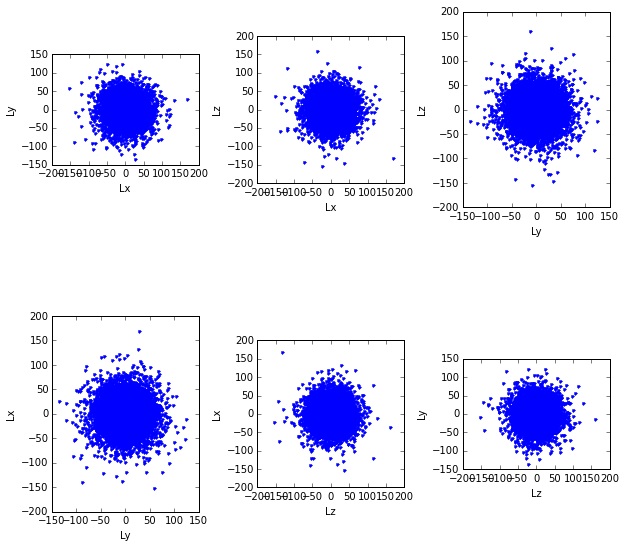

In [12]:
#kartesian coordinates
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(10,10))
axes[0,0].plot(L_1_kart,L_2_kart,'.')
axes[0,0].set_xlabel('Lx')
axes[0,0].set_ylabel('Ly')
axes[0,1].plot(L_1_kart,L_3_kart,'.')
axes[0,1].set_xlabel('Lx')
axes[0,1].set_ylabel('Lz')
axes[0,2].plot(L_2_kart,L_3_kart,'.')
axes[0,2].set_xlabel('Ly')
axes[0,2].set_ylabel('Lz')
axes[1,0].plot(L_2_kart,L_1_kart,'.')
axes[1,0].set_xlabel('Ly')
axes[1,0].set_ylabel('Lx')
axes[1,1].plot(L_3_kart,L_1_kart,'.')
axes[1,1].set_xlabel('Lz')
axes[1,1].set_ylabel('Lx')
axes[1,2].plot(L_3_kart,L_2_kart,'.')
axes[1,2].set_xlabel('Lz')
axes[1,2].set_ylabel('Ly')
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[0,2].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')
axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)


In [13]:
print(np.max(L_1_pol),np.max(L_2_pol),np.max(L_3_pol),np.min(L_1_pol),np.min(L_2_pol),np.min(L_3_pol))

(112367.18134405879, 200.70441642223247, 439.13551262133899, -172.88385878441923, -2772.4711044327005, -135.95696138156853)


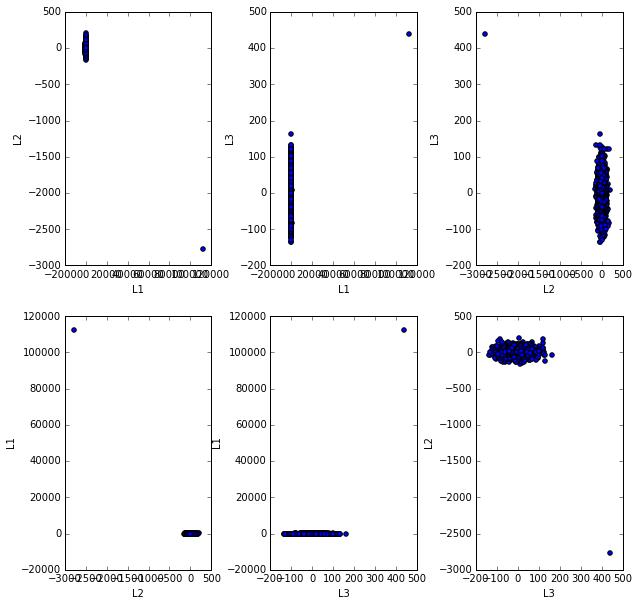

In [14]:
#spherical coordinates
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(10,10))
axes[0,0].scatter(L_1_pol,L_2_pol)
axes[0,0].set_xlabel('L1')
axes[0,0].set_ylabel('L2')
axes[0,1].scatter(L_1_pol,L_3_pol)
axes[0,1].set_xlabel('L1')
axes[0,1].set_ylabel('L3')
axes[0,2].scatter(L_2_pol,L_3_pol)
axes[0,2].set_xlabel('L2')
axes[0,2].set_ylabel('L3')
axes[1,0].scatter(L_2_pol,L_1_pol)
axes[1,0].set_xlabel('L2')
axes[1,0].set_ylabel('L1')
axes[1,1].scatter(L_3_pol,L_1_pol)
axes[1,1].set_xlabel('L3')
axes[1,1].set_ylabel('L1')
axes[1,2].scatter(L_3_pol,L_2_pol)
axes[1,2].set_xlabel('L3')
axes[1,2].set_ylabel('L2')
#axes[0,0].set_aspect('equal')
#axes[0,1].set_aspect('equal')
#axes[0,2].set_aspect('equal')
#axes[1,0].set_aspect('equal')
#axes[1,1].set_aspect('equal')
#axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)

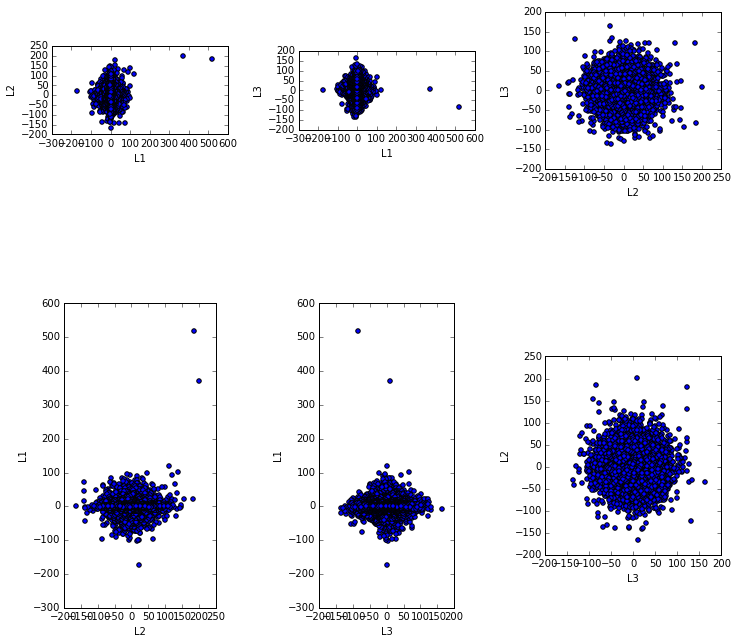

In [15]:
#spherical coordinates
#exclude angular momentum of bh
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(12,12))
axes[0,0].scatter(L_1_pol[1:],L_2_pol[1:])
axes[0,0].set_xlabel('L1')
axes[0,0].set_ylabel('L2')
axes[0,1].scatter(L_1_pol[1:],L_3_pol[1:])
axes[0,1].set_xlabel('L1')
axes[0,1].set_ylabel('L3')
axes[0,2].scatter(L_2_pol[1:],L_3_pol[1:])
axes[0,2].set_xlabel('L2')
axes[0,2].set_ylabel('L3')
axes[1,0].scatter(L_2_pol[1:],L_1_pol[1:])
axes[1,0].set_xlabel('L2')
axes[1,0].set_ylabel('L1')
axes[1,1].scatter(L_3_pol[1:],L_1_pol[1:])
axes[1,1].set_xlabel('L3')
axes[1,1].set_ylabel('L1')
axes[1,2].scatter(L_3_pol[1:],L_2_pol[1:])
axes[1,2].set_xlabel('L3')
axes[1,2].set_ylabel('L2')
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[0,2].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')
axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)


In [16]:
#if L2=L_theta and L3=L_phi then there shouldn't be a bulk rotation

sectional densitiy profiles
---

In [18]:
#in Scheiben um Achsen um  center of mass punkt 
xO=R_vector[0] #x component of center of mass
y0=R_vector[1] #y component of center of mass
z0=R_vector[2] #z component of center of mass

d=1 #kpc; just chose a random value

xy_level=np.array([[x],[y],[z[np.abs(z)<=d]]])
xz_level=np.array([[x],[y[np.abs(y)<=d]],[z]])
yz_level=np.array([[x[np.abs(x)<=d]],[y],[z]])

In [23]:
m_xy=m_ges[np.abs(z)<=d]
m_xz=m_ges[np.abs(y)<=d]
m_yz=m_ges[np.abs(x)<=d]
print(len(m_xy),len(m_xz), len(m_yz))
print(np.sum(m_xy),np.sum(m_xz),np.sum(m_yz))

(273342, 273589, 273678)
(108178.53776705998, 108186.53466136999, 108245.62410262002)
